In [196]:
#import tensorflow as tf
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>") )
import numpy as np
import netCDF4
from netCDF4 import Dataset, num2date
import data_generators
import time
import pygrib
import pickle
from scipy import interpolate
import matplotlib.pyplot as plt
#from mpl_toolkits import basemap
# import xarray as xr
# import cfgrib
# import pygrib


fn_mf = "Data/Rain_Data_Nov19/ana_input_1.nc"
fn_rain_Nov = "Data/Rain_Data_Nov19/rr_ens_mean_0.1deg_reg_v20.0e_197901-201907_uk.nc"
fn_rain_Mar = "Data/Rain_Data_Mar20/rr_ens_mean_0.1deg_reg_v20.0e_197901-201907_uk.nc"

#fn  = "/home/u1862646/ATI/BNN/Data/Rain_Data_Nov19/rr_ens_mean_0.1deg_reg_v20.0e_197901-201907_uk.nc" 

def ts_mkr( tss ):
    x = [ time.strftime("%H:%M %d/%m/%y", time.localtime(int(_val))) for _val in tss]
    return x

# Making New netcdf4 file that follows old format

## Getting geopotential data from autoconverted grib file. Since the geopotential data was not correctly copied 

## Netcd4 file making

In [6]:
ds_new = Dataset( 'Data/Rain_Data_Mar20/ana_input.nc','r', format="NETCDF4")

In [11]:
a = ds_new.variables['time'][0].data

In [13]:
a+1

283996801.0

In [4]:
ds_autoconv = Dataset( 'Data/Rain_Data_Mar20/archive/ana_cpdn_combined.nc', "r+", format="NETCDF4" ) #The dataset made by using cdo to convert from grib to cdf, this is missing the geopotential file
ds_old = Dataset( 'Data/Rain_Data_Nov19/ana_input.nc', "r", format="NETCDF4" ) #The dataset used in nov19 folder for model field data
ds_new = Dataset( 'Data/Rain_Data_Mar20/ana_input_new.nc','w', format="NETCDF4")

print( "AutoConv keys:{}".format(ds_autoconv.variables.keys()))
print( "Old keys:{}".format(ds_old.variables.keys()))

#Creating new Dimensions
ds_new.createDimension('time', 59900)
ds_new.createDimension('latitude', 20)
ds_new.createDimension('longitude', 21)

#formatting all variables to conform with old dataset

#geopotential
    # Adding new Geopotential Data
geo_data = pickle.load(open("Data/Rain_Data_Mar20/archive/geopotential.np","rb")  )
ds_new.createVariable('geopotential','float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 )
ds_new.variables['geopotential'][:] = geo_data

ds_new.variables['geopotential'].standard_name = "geopotential"
ds_new.variables['geopotential'].long_name = "geopotential"
ds_new.variables['geopotential'].units = "m2 s-2"
ds_new.variables['geopotential'].grid_mapping = "latitude_longitude"

del geo_data

#y_wind
ds_new.createVariable('y_wind', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36  )
ds_new.variables['y_wind'].standard_name = "y_wind"
ds_new.variables['y_wind'].long_name = "y_wind"
ds_new.variables['y_wind'].units = "m s-1"
ds_new.variables['y_wind'][:] =  ds_autoconv.variables['v'][:]

#x_wind
ds_new.createVariable('x_wind', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 )
ds_new.variables['x_wind'].standard_name = "x_wind"
ds_new.variables['x_wind'].long_name = "x_wind"
ds_new.variables['x_wind'].units = "m s-1"
ds_new.variables['x_wind'][:] =  ds_autoconv.variables['u'][:]

#time
ds_new.createVariable('time', 'float64', dimensions=('time'), fill_value=9.969209968386869e+36)
ds_new.variables['time'].axis = "T"
ds_new.variables['time'].units ="hours since 1970-01-01 00:00:00"
ds_new.variables['time'].standard_name = "time"
ds_new.variables['time'].calendar = "gregorian"
ds_new.variables['time'][:] =  ds_autoconv.variables['time'][:]

#latitude
ds_new.createVariable('latitude', 'float64', dimensions=('latitude'), fill_value=9.969209968386869e+36 )
ds_new.variables['latitude'].axis = "Y"
ds_new.variables['latitude'].units = "Degrees North"
ds_new.variables['latitude'].standard_name = "latitude"
ds_new.variables['latitude'][:] = ds_autoconv.variables['latitude'][:]

#longitude
ds_new.createVariable('longitude', 'float64', dimensions=('longitude'), fill_value=9.969209968386869e+36)
ds_new.variables['longitude'].axis = "Y"
ds_new.variables['longitude'].units = "Degrees East"
ds_new.variables['longitude'].standard_name = "longitude"
ds_new.variables['longitude'][:] = ds_autoconv.variables['longitude'][:]


#unknown_local_param_137_128 (total coloumn water vapour)
ds_new.createVariable('unknown_local_param_137_128', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36)
ds_new.variables['unknown_local_param_137_128'].standard_name = "total coloumn water vapour" 
ds_new.variables['unknown_local_param_137_128'][:] = ds_autoconv.variables['tcwv'][:]


#unknown_local_param_133_128 (specific humidity)
ds_new.createVariable('unknown_local_param_133_128', 'float64', dimensions= ('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 )
ds_new.variables['unknown_local_param_133_128'].standard_name = "specific humidity"
ds_new.variables['unknown_local_param_133_128'][:] = ds_autoconv.variables['q'][:]

#air_temperature
ds_new.createVariable('air_temperature','float64', dimensions= ('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 )
ds_new.variables['air_temperature'].units = "K"
ds_new.variables['air_temperature'][:] = ds_autoconv.variables['t'][:]

ds_new.close()

AutoConv keys:dict_keys(['number', 'time', 'step', 'surface', 'latitude', 'longitude', 'valid_time', 'tcwv', 'isobaricInhPa', 't', 'q', 'u', 'v'])
Old keys:dict_keys(['unknown_local_param_137_128', 'latitude_longitude', 'time', 'latitude', 'longitude', 'forecast_period', 'originating_centre', 'unknown_local_param_133_128', 'pressure', 'air_temperature', 'geopotential', 'pressure_0', 'x_wind', 'y_wind'])


# Data Inspection

In [ ]:
#ATI Means for variables
vars_for_feature = ['unknown_local_param_137_128', 'unknown_local_param_133_128', 'air_temperature', 'geopotential', 'x_wind', 'y_wind' ]
with Dataset(fn_mf, "r", format="NETCDF4") as f:
    for idx, name in enumerate(vars_for_feature):
        _dat = f.variables[name][:]
        print( name)
        print("mean","\t",_dat.mean() )
        print("max","\t",_dat.max() )
        print("min","\t",_dat.min() )
        print("\n")
with Dataset(fn_rain, "r", format="NETCDF4") as f:
    _dat = f.variables["rr"][:]
    print( "rain")
    print("mean","\t",_dat.mean() )
    print("max","\t",_dat.max() )
    print("min","\t",_dat.min() )
    print("\n")

In [ ]:
with Dataset(fn_mf, "r", format="NETCDF4") as f1:
    _data_mf = f1.variables["time"][:]
    starting_time_mf = _data_mf[0]
#     a = f.variables['longitude'][:]
#     b = f.variables['latitude'][:]

with Dataset(fn_rain, "r", format="NETCDF4") as f2:
    _data_r = f2.variables["time"][:]
    starting_time_r = _data_r[0]
#     a = f.variables['longitude'][:]
#     b = f.variables['latitude'][:]

In [ ]:
print(starting_time_mf)
print(starting_time_r)

#"""Rain starts 10592 days after 1950-01-01:00:00:00 """
#"""MF starts hours since 1979-01-01:00:"""

In [ ]:
_data_mf[0]2

In [ ]:
np.alltrue((_data_r[1:] - _data_r[:-1])==1)

In [ ]:
time_length = 4
print( ts_mkr(_data_mf[:time_length*4]) )
print( ts_mkr(_data_r[:time_length]) )

In [ ]:
_data_r[:100]

In [ ]:
_data_mf[:8]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def heatmap2d(arr: np.ndarray):
    plt.imshow(arr, cmap='viridis')
    plt.colorbar()
    plt.show()
    
heatmap2d(_data[1500, :,:])

In [ ]:
start_idx = 10500
_data[start_idx:start_idx+100,70,102]
_data[start_idx,70,102]

In [ ]:
ds_rain.find_idx_of_city("London")

In [ ]:
ds_mf = data_generators.Generator_mf(fn = fn_mf)
#ds_gen = ds_mf()
#ds_gen_tf = tf.data.Dataset.from_generator( ds_mf, output_types=(tf.float32, tf.bool) )
#ds_gen_tf = ds_gen_tf = ds_gen_tf.batch(100)
#ds_gen_tf_iter = iter(ds_gen_tf)


In [ ]:
a = next(ds_gen)

In [ ]:
a[1].shape


In [ ]:
next(ds_gen_tf_iter)

In [ ]:
ds_rain = data_generators.Generator_rain(fn = fn_rain)
ds_rain_gen = ds_rain()
ds_rain_gen_tf = tf.data.Dataset.from_generator( ds_rain, output_types=(tf.float32, tf.bool) )
ds_rain_gen_tf = ds_gen_tf = ds_rain_gen_tf.batch(100)
ds_rain_gen_tf_iter = iter(ds_gen_tf)

# Testing Shermans new data extraction methods


## Rain 

In [ ]:
dataset_rain = Dataset(fn_rain, "r", format="NETCDF4")
data_rain = dataset_rain.variables
print(dataset_rain.__doc__)

In [ ]:
type(dataset_rain)

In [ ]:
#data is an ordered dict
#loop through the keys and print it
print("The name of the variables are:")
for key in data_rain.keys():
    print(key)
print()


In [ ]:
#print each item in dat
print("For each of the variables, here are the properties:\n")
for key, value in data_rain.items():
    print("Variable: " + key)
    print(value)
    print()

In [ ]:
a = data_rain['rr'][1000].mask
np.count_nonzero(a)/np.size(a)

In [ ]:
np.argwhere(a=False)

In [ ]:
np.asarray( data['rr'] ).shape

In [ ]:
data['time'][:20]

## model fields

In [ ]:
mf_dataset = Dataset(fn_mf, "r", format="NETCDF4")
mf_data = mf_dataset.variables

In [ ]:
#data is an ordered dict
#loop through the keys and print it
print("The name of the variables are:")
for key in mf_data.keys():
    print(key)
print()


In [ ]:
#print each item in dat
print("For each of the variables, here are the properties:\n")
for key, value in mf_data.items():
    print("Variable: " + key)
    print(value)
    print()

In [ ]:
mf_data['air_temperature'].shape

# Testing Data Generators

In [ ]:
# import tensorflow as tf
# import netCDF4
# from netCDF4 import Dataset
# import gdal
# import numpy as np

#TODO:(akanni-ade): add ability to return long/lat variable  implement long/lat

"""
    Example of how to use
    import Generators

    rr_ens file 
    _filename = "Data/Rain_Data/rr_ens_mean_0.1deg_reg_v20.0e_197901-201907_djf_uk.nc"
    rain_gen = Generator_rain(_filename, all_at_once=True)
    data = next(iter(grib_gen))

    Grib Files
    _filename = 'Data/Rain_Data/ana_coarse.grib'
    grib_gen = Generators.Generator_grib(fn=_filename, all_at_once=True)
    data = next(iter(grib_gen))

    Grib Files Location:
    _filename = 'Data/Rain_Data/ana_coarse.grib'
    grib_gen = Generators.Generator_grib(fn=_filename, all_at_once=True)
    arr_long, arr_lat = grib_gen.locaiton()
    #now say you are investingating the datum x = data[15,125]
    #   to get the longitude and latitude you must do
    long, lat = arr_long(15,125), arr_lat(15,125)


"""
class Generator():
    
    def __init__(self, fn = "", all_at_once=False, train_size=0.75, channel=None ):
        self.generator = None
        self.all_at_once = all_at_once
        self.fn = fn
        self.channel = channel
    
    def yield_all(self):
        pass

    def yield_iter(self):
        pass

    def long_lat(self):
        pass

    def __call__(self,x=0):
        if(self.all_at_once):
            return self.yield_all()
        else:
            return self.yield_iter(x)
         
class Generator_mf(Generator):
    """
        Creates a generator for the model_fields_data
    
        :param all_at_once: whether to return all data, or return data in batches

        :param channel: the desired channel of information in the grib file
            Default None, then concatenate all channels together and return
            If an integer return this band
    """

    def __init__(self, **generator_params):

        super(Generator_mf, self).__init__(**generator_params)

        self.vars_for_feature = ['unknown_local_param_137_128', 'unknown_local_param_133_128', 'air_temperature', 'geopotential', 'x_wind', 'y_wind' ]
        self.channel_count = len(self.vars_for_feature) 
        

    def yield_all(self):
        raise NotImplementedError
    
    def yield_iter(self):
        with Dataset(self.fn, "r", format="NETCDF4") as f:
            for tuple_mfs in zip( *[f.variables[var_name] for var_name in self.vars_for_feature ] ):
                
                list_datamask = [ (np.ma.getdata(_mar),np.ma.getmask(_mar) ) for _mar in tuple_mfs ]
                
                _data, _masks= list( zip (*list_datamask ) )
                
                
                stacked_data = np.stack(_data, axis=-1 )
                stacked_masks = np.stack(_masks, axis=-1 )
                
                yield stacked_data, stacked_masks
            
            
        
    def location(self):
        """
        Returns a 2 1D arrays
            arr_long: Longitudes
            arr_lat: Latitdues
        Example of how to use:


        """
        raise NotImplementedError
        
class Generator_rain2(Generator):
    def __init__(self, **generator_params):
        super(Generator_rain2, self).__init__(**generator_params)

    def yield_all(self,start_idx=0):
        with Dataset(self.fn, "r", format="NETCDF4") as f:
            _data = f.variables['rr'][start_idx:]
            yield np.ma.getdata(_data), np.ma.getmask(_data)   
            
    def yield_iter(self,start_idx=0):
        f = Dataset(self.fn, "r", format="NETCDF4")
        #with Dataset(self.fn, "r", format="NETCDF4") as f:
            #for chunk in f.variables['rr'][start_idx:]:
        
        #for chunk in f.variables['rr'][start_idx:]:
        for chunk in f.variables['rr'][start_idx:]:
            yield np.ma.getdata(chunk), np.ma.getmask(chunk)

## rain genenerator

In [ ]:
#rain_gen = Generator_rain(fn=fn_rain, all_at_once=False)()
rain_gen2 = Generator_rain2(fn=fn,all_at_once=False)()
data = next(iter(rain_gen2))
data

In [ ]:
fn_rain

In [ ]:
ds_tar = tf.data.Dataset.from_generator(lambda : Generator_rain2(fn=fn, all_at_once=False)(0), output_types= ( tf.float32, tf.bool) )

In [ ]:
next(iter(ds_tar) )

## model feild generator

In [ ]:
mf_gen = Generator_mf(fn=fn_mf, all_at_once=False)()
data = next(iter(mf_gen))

In [ ]:
data[0].shape

In [ ]:
mask.shape

# Fixing mismatch in size of Feature and Target in Nov Data

In [16]:
rain_lat = data_rain['latitude'] #100
rain_lon = data_rain['longitude'] #140

mf_latlon = mf_data['latitude_longitude']
mf_lat = mf_data['latitude'] #103
mf_lon = mf_data['longitude'] #144

NameError: name 'data_rain' is not defined

In [ ]:
rain_lat[:]

In [ ]:
mf_lat[::-1]

In [ ]:
#Latitude transformation 
mf_lat[::-1][1:-2] - rain_lat[:]

In [ ]:
mf_lat[-2:1:-1] - rain_lat[:]

In [ ]:
rain_lon[:]

In [ ]:
mf_lon[:]

In [ ]:
rain_lon[:] - mf_lon[2:-2]

# Fixing mismatch in size/location of Feature and Target in March Data

In [21]:
ds_mf_new = Dataset( 'Data/Rain_Data_Mar20/ana_input.nc','r', format="NETCDF4")
ds_rain = Dataset(fn_rain_Mar, "r", format="NETCDF4")

In [22]:
rain_lat = ds_rain.variables['latitude'] #100
rain_lon = ds_rain.variables['longitude'] #140

mf_lat = ds_mf_new.variables['latitude'] #20 --> 18
mf_lon = ds_mf_new.variables['longitude'] #21 --> 18

## Latitude

In [24]:
rain_lat[::6]

masked_array(data=[49.04985973, 49.6498597 , 50.24985968, 50.84985965,
                   51.44985963, 52.0498596 , 52.64985958, 53.24985955,
                   53.84985953, 54.4498595 , 55.04985948, 55.64985945,
                   56.24985943, 56.8498594 , 57.44985938, 58.04985935,
                   58.64985933],
             mask=False,
       fill_value=1e+20)

In [28]:
mf_lat[-2:1:-1]

masked_array(data=[49.44363158, 49.99926316, 50.55489474, 51.11052632,
                   51.66615789, 52.22178947, 52.77742105, 53.33305263,
                   53.88868421, 54.44431579, 54.99994737, 55.55557895,
                   56.11121053, 56.66684211, 57.22247368, 57.77810526,
                   58.33373684],
             mask=False,
       fill_value=1e+20)

In [27]:
#Latitude transformation 
rain_lat[::6]-mf_lat[-2:1:-1]

masked_array(data=[-0.39377185, -0.34940346, -0.30503506, -0.26066666,
                   -0.21629827, -0.17192987, -0.12756148, -0.08319308,
                   -0.03882468,  0.00554371,  0.04991211,  0.09428051,
                    0.1386489 ,  0.1830173 ,  0.22738569,  0.27175409,
                    0.31612249],
             mask=False,
       fill_value=1e+20)

## Longitude

In [29]:
rain_lon[::8]

masked_array(data=[-10.95013957, -10.15013957,  -9.35013957,  -8.55013957,
                    -7.75013958,  -6.95013958,  -6.15013958,  -5.35013959,
                    -4.55013959,  -3.75013959,  -2.9501396 ,  -2.1501396 ,
                    -1.3501396 ,  -0.55013961,   0.24986039,   1.04986039,
                     1.84986038,   2.64986038],
             mask=False,
       fill_value=1e+20)

In [30]:
mf_lon[2:-1]

masked_array(data=[-1.08333e+01, -9.99995e+00, -9.16660e+00, -8.33325e+00,
                   -7.49990e+00, -6.66655e+00, -5.83320e+00, -4.99985e+00,
                   -4.16650e+00, -3.33315e+00, -2.49980e+00, -1.66645e+00,
                   -8.33100e-01,  2.50000e-04,  8.33600e-01,  1.66695e+00,
                    2.50030e+00,  3.33365e+00],
             mask=False,
       fill_value=1e+20)

In [36]:
( rain_lon[::8] - mf_lon[2:-1] ).mean()

-0.40031459240936296

In [35]:
(rain_lon[::8]  - mf_lon[1:-2] ).mean()

0.43303540759063697

In [42]:
rain_lon[::8] - mf_lon[2:-3]

masked_array(data=[-0.11683957, -0.05018957,  0.01646043,  0.08311042,
                    0.14976042,  0.21641042,  0.28306041,  0.34971041,
                    0.41636041,  0.4830104 ,  0.5496604 ,  0.6163104 ,
                    0.68296039,  0.74961039,  0.81626038,  0.88291038],
             mask=False,
       fill_value=1e+20)

# Interpolating New Coarse Model Field Data

## Seeing if new coarse model field data aligns to old fine model field data

In [24]:
ds_rain = Dataset(fn_rain_Nov,'r',format="NETCDF4")
ds_mf_old = Dataset('Data/Rain_Data_Nov19/ana_input.nc','r',format="NETCDF4")
ds_mf_new = Dataset( 'Data/Rain_Data_Mar20/ana_input.nc','r', format="NETCDF4")

In [80]:
rain_lat = ds_rain['latitude']
rain_lon = ds_rain['longitude']

old_mf_lat = ds_mf_old['latitude']
old_mf_lon  = ds_mf_old['longitude']

new_mf_lat = ds_mf_new['latitude']
new_mf_lon = ds_mf_new['longitude']

In [82]:
rain_lat[::-1]

100

In [79]:
old_mf_lat[:]

masked_array(data=[59.15, 59.05, 58.95, 58.85, 58.75, 58.65, 58.55, 58.45,
                   58.35, 58.25, 58.15, 58.05, 57.95, 57.85, 57.75, 57.65,
                   57.55, 57.45, 57.35, 57.25, 57.15, 57.05, 56.95, 56.85,
                   56.75, 56.65, 56.55, 56.45, 56.35, 56.25, 56.15, 56.05,
                   55.95, 55.85, 55.75, 55.65, 55.55, 55.45, 55.35, 55.25,
                   55.15, 55.05, 54.95, 54.85, 54.75, 54.65, 54.55, 54.45,
                   54.35, 54.25, 54.15, 54.05, 53.95, 53.85, 53.75, 53.65,
                   53.55, 53.45, 53.35, 53.25, 53.15, 53.05, 52.95, 52.85,
                   52.75, 52.65, 52.55, 52.45, 52.35, 52.25, 52.15, 52.05,
                   51.95, 51.85, 51.75, 51.65, 51.55, 51.45, 51.35, 51.25,
                   51.15, 51.05, 50.95, 50.85, 50.75, 50.65, 50.55, 50.45,
                   50.35, 50.25, 50.15, 50.05, 49.95, 49.85, 49.75, 49.65,
                   49.55, 49.45, 49.35, 49.25, 49.15, 49.05, 48.95],
             mask=False,
      

In [51]:
new_mf_lat[:]

masked_array(data=[59.445     , 58.88936842, 58.33373684, 57.77810526,
                   57.22247368, 56.66684211, 56.11121053, 55.55557895,
                   54.99994737, 54.44431579, 53.88868421, 53.33305263,
                   52.77742105, 52.22178947, 51.66615789, 51.11052632,
                   50.55489474, 49.99926316, 49.44363158, 48.888     ],
             mask=False,
       fill_value=1e+20)

In [78]:
rain_lon[:]

masked_array(data=[-10.95013957, -10.85013957, -10.75013957, -10.65013957,
                   -10.55013957, -10.45013957, -10.35013957, -10.25013957,
                   -10.15013957, -10.05013957,  -9.95013957,  -9.85013957,
                    -9.75013957,  -9.65013957,  -9.55013957,  -9.45013957,
                    -9.35013957,  -9.25013957,  -9.15013957,  -9.05013957,
                    -8.95013957,  -8.85013957,  -8.75013957,  -8.65013957,
                    -8.55013957,  -8.45013958,  -8.35013958,  -8.25013958,
                    -8.15013958,  -8.05013958,  -7.95013958,  -7.85013958,
                    -7.75013958,  -7.65013958,  -7.55013958,  -7.45013958,
                    -7.35013958,  -7.25013958,  -7.15013958,  -7.05013958,
                    -6.95013958,  -6.85013958,  -6.75013958,  -6.65013958,
                    -6.55013958,  -6.45013958,  -6.35013958,  -6.25013958,
                    -6.15013958,  -6.05013958,  -5.95013959,  -5.85013959,
                    -5.75

In [54]:
old_mf_lon[:]

masked_array(data=[-11.15, -11.05, -10.95, -10.85, -10.75, -10.65, -10.55,
                   -10.45, -10.35, -10.25, -10.15, -10.05,  -9.95,  -9.85,
                    -9.75,  -9.65,  -9.55,  -9.45,  -9.35,  -9.25,  -9.15,
                    -9.05,  -8.95,  -8.85,  -8.75,  -8.65,  -8.55,  -8.45,
                    -8.35,  -8.25,  -8.15,  -8.05,  -7.95,  -7.85,  -7.75,
                    -7.65,  -7.55,  -7.45,  -7.35,  -7.25,  -7.15,  -7.05,
                    -6.95,  -6.85,  -6.75,  -6.65,  -6.55,  -6.45,  -6.35,
                    -6.25,  -6.15,  -6.05,  -5.95,  -5.85,  -5.75,  -5.65,
                    -5.55,  -5.45,  -5.35,  -5.25,  -5.15,  -5.05,  -4.95,
                    -4.85,  -4.75,  -4.65,  -4.55,  -4.45,  -4.35,  -4.25,
                    -4.15,  -4.05,  -3.95,  -3.85,  -3.75,  -3.65,  -3.55,
                    -3.45,  -3.35,  -3.25,  -3.15,  -3.05,  -2.95,  -2.85,
                    -2.75,  -2.65,  -2.55,  -2.45,  -2.35,  -2.25,  -2.15,
                    -2.05

In [55]:
new_mf_lon[:]

masked_array(data=[-1.250000e+01, -1.166665e+01, -1.083330e+01,
                   -9.999950e+00, -9.166600e+00, -8.333250e+00,
                   -7.499900e+00, -6.666550e+00, -5.833200e+00,
                   -4.999850e+00, -4.166500e+00, -3.333150e+00,
                   -2.499800e+00, -1.666450e+00, -8.331000e-01,
                    2.500000e-04,  8.336000e-01,  1.666950e+00,
                    2.500300e+00,  3.333650e+00,  4.167000e+00],
             mask=False,
       fill_value=1e+20)

# Making Interpolated Datasets

In [50]:
ds_mf_new_linear_intrp = Dataset( 'Data/Rain_Data_Mar20/ana_input_intrp_bilinear.nc','w', format="NETCDF4")
ds_mf_new_cubic_intrp = Dataset( 'Data/Rain_Data_Mar20/ana_input_intrp_cubic.nc','w', format="NETCDF4")
ds_mf_old = Dataset('Data/Rain_Data_Nov19/ana_input.nc','r',format="NETCDF4")
ds_mf_new = Dataset( 'Data/Rain_Data_Mar20/ana_input.nc','r', format="NETCDF4")

# Getting new finer interpolation points
old_mf_lat = ds_mf_old['latitude']
old_mf_lon  = ds_mf_old['longitude']
lats_intrp, lons_intrp  = np.meshgrid( old_mf_lat[:].data, old_mf_lon[:].data)

# Getting old coarse interpoaltion poitns
orig_mf_lat = ds_mf_new.variables['latitude']
orig_mf_lon = ds_mf_new.variables['longitude']
lats_orig, lons_orig = np.meshgrid(orig_mf_lat[:].data,  orig_mf_lon[:].data)

In [94]:
ds_mf_new_linear_intrp = Dataset( 'Data/Rain_Data_Mar20/ana_input_intrp_bilinear.nc','w', format="NETCDF4")
ds_mf_new_cubic_intrp = Dataset( 'Data/Rain_Data_Mar20/ana_input_intrp_cubic.nc','w', format="NETCDF4")
ds_mf_old = Dataset('Data/Rain_Data_Nov19/ana_input.nc','r',format="NETCDF4")
ds_mf_new = Dataset( 'Data/Rain_Data_Mar20/ana_input.nc','r', format="NETCDF4")

# Getting new finer interpolation points
old_mf_lat = ds_mf_old['latitude']
old_mf_lon  = ds_mf_old['longitude']
lats_intrp, lons_intrp  = np.meshgrid( old_mf_lat[:].data, old_mf_lon[:].data)

# Getting old coarse interpoaltion poitns
orig_mf_lat = ds_mf_new['latitude']
orig_mf_lon = ds_mf_new['longitude']
lats_orig, lons_orig = np.meshgrid(orig_mf_lat.data[:],  orig_mf_lon[:].data)


#Creating new Dimensions
ds_mf_new_linear_intrp.createDimension('time', 59900)
ds_mf_new_linear_intrp.createDimension('latitude', 103)
ds_mf_new_linear_intrp.createDimension('longitude', 144)

#Creating Variables
    
    #geopotential
ds_mf_new_linear_intrp.createVariable('geopotential','float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 , zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['geopotential'].standard_name = "geopotential"
ds_mf_new_linear_intrp.variables['geopotential'].long_name = "geopotential"
ds_mf_new_linear_intrp.variables['geopotential'].units = "m2 s-2"
ds_mf_new_linear_intrp.variables['geopotential'].grid_mapping = "latitude_longitude"
ds_mf_new_linear_intrp.variables['geopotential'][:] = manual_interpolater(ds_mf_new.variables['geopotential'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')

    #y_wind
ds_mf_new_linear_intrp.createVariable('y_wind', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 , zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['y_wind'].standard_name = "y_wind"
ds_mf_new_linear_intrp.variables['y_wind'].long_name = "y_wind"
ds_mf_new_linear_intrp.variables['y_wind'].units = "m s-1"
ds_mf_new_linear_intrp.variables['y_wind'][:] =  manual_interpolater(ds_mf_new.variables['y_wind'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')
    #x_wind
ds_mf_new_linear_intrp.createVariable('x_wind', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 , zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['x_wind'].standard_name = "x_wind"
ds_mf_new_linear_intrp.variables['x_wind'].long_name = "x_wind"
ds_mf_new_linear_intrp.variables['x_wind'].units = "m s-1"
ds_mf_new_linear_intrp.variables['x_wind'][:] =  manual_interpolater(ds_mf_new.variables['x_wind'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')

    #time
ds_mf_new_linear_intrp.createVariable('time', 'float64', dimensions=('time'), fill_value=9.969209968386869e+36, zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['time'].axis = "T"
ds_mf_new_linear_intrp.variables['time'].units ="hours since 1970-01-01 00:00:00"
ds_mf_new_linear_intrp.variables['time'].standard_name = "time"
ds_mf_new_linear_intrp.variables['time'].calendar = "gregorian"
ds_mf_new_linear_intrp.variables['time'][:] =  ds_mf_new.variables['time'][:]



    #latitude
ds_mf_new_linear_intrp.createVariable('latitude', 'float64', dimensions=('latitude'), fill_value=9.969209968386869e+36, zlib=True, complevel=9  )
ds_mf_new_linear_intrp.variables['latitude'].axis = "Y"
ds_mf_new_linear_intrp.variables['latitude'].units = "Degrees North"
ds_mf_new_linear_intrp.variables['latitude'].standard_name = "latitude"
ds_mf_new_linear_intrp.variables['latitude'][:] = old_mf_lat


    #longitude
ds_mf_new_linear_intrp.createVariable('longitude', 'float64', dimensions=('longitude'), fill_value=9.969209968386869e+36, zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['longitude'].axis = "Y"
ds_mf_new_linear_intrp.variables['longitude'].units = "Degrees East"
ds_mf_new_linear_intrp.variables['longitude'].standard_name = "longitude"
ds_mf_new_linear_intrp.variables['longitude'][:] = old_mf_lon


#unknown_local_param_137_128 (total coloumn water vapour)
ds_mf_new_linear_intrp.createVariable('unknown_local_param_137_128', 'float64', dimensions=('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36, zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['unknown_local_param_137_128'].standard_name = "total coloumn water vapour" 
ds_mf_new_linear_intrp.variables['unknown_local_param_137_128'][:] =  manual_interpolater(ds_mf_new.variables['unknown_local_param_137_128'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')


#unknown_local_param_133_128 (specific humidity)
ds_mf_new_linear_intrp.createVariable('unknown_local_param_133_128', 'float64', dimensions= ('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 , zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['unknown_local_param_133_128'].standard_name = "specific humidity"
ds_mf_new_linear_intrp.variables['unknown_local_param_133_128'][:] = manual_interpolater(ds_mf_new.variables['unknown_local_param_133_128'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')

#air_temperature
ds_mf_new_linear_intrp.createVariable('air_temperature','float64', dimensions= ('time', 'latitude', 'longitude'), fill_value=9.969209968386869e+36 , zlib=True, complevel=9 )
ds_mf_new_linear_intrp.variables['air_temperature'].units = "K"
ds_mf_new_linear_intrp.variables['air_temperature'][:] = manual_interpolater(ds_mf_new.variables['air_temperature'][:].data,
                                                                    (lats_orig, lons_orig) , (lats_intrp, lons_intrp),
                                                                    method='linear')

ds_mf_new_linear_intrp.close()

def manual_interpolater( data, old_latlon, new_latlon ,method='linear' ):
    for i in range( len( data ) ):
        data[i] = interpolate.griddata( points= old_latlon ,
                                                        values=  ds_mf_new.variables['unknown_local_param_133_128'][:].data ,
                                                        xi=new_latlon,
                                                        method=method)
    return data

{'__name__': 'mpl_toolkits',
 '__doc__': None,
 '__package__': 'mpl_toolkits',
 '__loader__': <_frozen_importlib_external._NamespaceLoader at 0x7ff96a9631d0>,
 '__spec__': ModuleSpec(name='mpl_toolkits', loader=<_frozen_importlib_external._NamespaceLoader object at 0x7ff96a9631d0>, submodule_search_locations=_NamespacePath(['/home/u1862646/.local/lib/python3.7/site-packages/mpl_toolkits', '/usr/lib/python3/dist-packages/mpl_toolkits'])),
 '__file__': None,
 '__path__': _NamespacePath(['/home/u1862646/.local/lib/python3.7/site-packages/mpl_toolkits', '/usr/lib/python3/dist-packages/mpl_toolkits'])}

In [19]:
old_mf_lat = ds_mf_old['latitude']
old_mf_lon  = ds_mf_old['longitude']

interp_lat = old_mf_lat[:].data
interp_lon = old_mf_lon[:].data

lons_sub, lats_sub = np.meshgrid( interp_lat, interp_lon)


[array([[59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95],
        [59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95],
        [59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95],
        ...,
        [59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95],
        [59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95],
        [59.15, 59.05, 58.95, ..., 49.15, 49.05, 48.95]]),
 array([[-11.15, -11.15, -11.15, ..., -11.15, -11.15, -11.15],
        [-11.05, -11.05, -11.05, ..., -11.05, -11.05, -11.05],
        [-10.95, -10.95, -10.95, ..., -10.95, -10.95, -10.95],
        ...,
        [  2.95,   2.95,   2.95, ...,   2.95,   2.95,   2.95],
        [  3.05,   3.05,   3.05, ...,   3.05,   3.05,   3.05],
        [  3.15,   3.15,   3.15, ...,   3.15,   3.15,   3.15]])]

In [37]:
old_mf_lat[:]

masked_array(data=[59.15, 59.05, 58.95, 58.85, 58.75, 58.65, 58.55, 58.45,
                   58.35, 58.25, 58.15, 58.05, 57.95, 57.85, 57.75, 57.65,
                   57.55, 57.45, 57.35, 57.25, 57.15, 57.05, 56.95, 56.85,
                   56.75, 56.65, 56.55, 56.45, 56.35, 56.25, 56.15, 56.05,
                   55.95, 55.85, 55.75, 55.65, 55.55, 55.45, 55.35, 55.25,
                   55.15, 55.05, 54.95, 54.85, 54.75, 54.65, 54.55, 54.45,
                   54.35, 54.25, 54.15, 54.05, 53.95, 53.85, 53.75, 53.65,
                   53.55, 53.45, 53.35, 53.25, 53.15, 53.05, 52.95, 52.85,
                   52.75, 52.65, 52.55, 52.45, 52.35, 52.25, 52.15, 52.05,
                   51.95, 51.85, 51.75, 51.65, 51.55, 51.45, 51.35, 51.25,
                   51.15, 51.05, 50.95, 50.85, 50.75, 50.65, 50.55, 50.45,
                   50.35, 50.25, 50.15, 50.05, 49.95, 49.85, 49.75, 49.65,
                   49.55, 49.45, 49.35, 49.25, 49.15, 49.05, 48.95],
             mask=False,
      

In [131]:
intrp_mf_lat.shape

(103,)

In [129]:
intrp_mf_lon.shape

(144,)

In [133]:
orig_mf_lon.shape

(21,)

In [132]:
orig_mf_lat.shape

(20,)

In [336]:
# Getting new finer interpolation points
intrp_mf_lat = ds_mf_old['latitude'][:].data
intrp_mf_lon  = ds_mf_old['longitude'][:].data
lat_intrp, lon_intrp   = np.meshgrid( intrp_mf_lat[:].data, intrp_mf_lon[:].data)
latlon_intrp = ( lat_intrp, lon_intrp) #latlon_intrp = ( lon_intrp,lat_intrp)


# Getting old coarse interpoaltion poitns
orig_mf_lat = ds_mf_new.variables['latitude'][:].data
orig_mf_lon = ds_mf_new.variables['longitude'][:].data
lat_orig, lon_orig,  = np.meshgrid(orig_mf_lat[:].data,  orig_mf_lon[:].data)

latlon_orig =(lat_orig.T, lon_orig.T) #latlon_orig =(lat_orig.flatten(), lon_orig.flatten()) #
#latlon_orig =(lon_orig.flatten(),lat_orig.flatten())


data = ds_mf_new.variables['air_temperature'][:1].data
shape = [1, 103, 144]


new_data = np.zeros( shape = shape )

#assert (new_data.shape[0] == data.shape[0])
for i in range( len( data ) ):
    new_data[i] = ( interpolate.griddata( points= (lat_orig.T.flatten(), lon_orig.T.flatten()) ,
                                                    values=data[i].flatten(),
                                                    xi=latlon_intrp,
                                                    method='cubic') ).T
#     _lop = ( interpolate.griddata( points= (lat_orig.T.flatten(), lon_orig.T.flatten()) ,
#                                                     values=data[i].flatten(),
#                                                     xi=latlon_intrp,
#                                                     method='linear') ).T

In [342]:
ds_mf_new.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    _FillValue: 9.969209968386869e+36
    axis: T
    units: hours since 1970-01-01 00:00:00
    standard_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (59900,)
filling on

(42,)

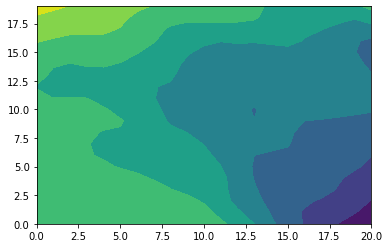

In [323]:
g = plt.contourf(*ds_mf_new.variables['air_temperature'][:1])

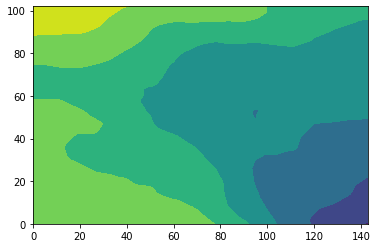

In [335]:
i = plt.contourf(*new_data)

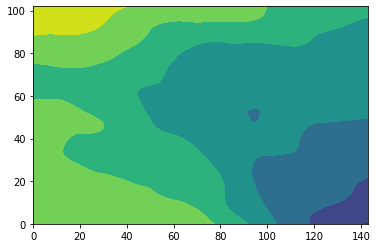

In [337]:
i = plt.contourf(*new_data)

In [214]:
plt.close()

In [298]:
_lop.shape_

(144, 103)